# 📊 Aula: Testes de Normalidade Paramétricos

## 🔍 Introdução

Muitos testes estatísticos exigem que os dados sigam uma distribuição normal (ex.: teste *t*, ANOVA). Se os dados não forem normais, usamos testes não paramétricos (ex.: Mann-Whitney, Kruskal-Wallis).

Por que testar normalidade?
* Validar suposições de modelos estatísticos. ✅
* Evitar conclusões erradas em pesquisas médicas. ❌

## 🔍 Qual é o Melhor Teste de Normalidade?

Não existe um teste "melhor" universal, mas sim o mais adequado para cada situação:

**Para amostras pequenas (n < 50):**
* Shapiro-Wilk é o mais recomendado (mais preciso).
* Exemplo: Verificar normalidade em um estudo piloto com 30 pacientes.

**Para amostras grandes (n ≥ 50):**
* Kolmogorov-Smirnov (K-S) ou Anderson-Darling.
* Exemplo: Analisar dados de um censo de saúde com 1000 registros.

**Se você suspeita de problemas nas caudas da distribuição:**
* Anderson-Darling (mais sensível a extremos).
* Exemplo: Dados de sobrevivência com possíveis outliers.

**Se os parâmetros (média e variância) são desconhecidos:**
* Lilliefors (versão modificada do K-S).

**Comparação:**

| Teste            | Tamanho Amostral Ideal | Detecta                          | Vantagens                         | Limitações                      |
|------------------|------------------------|----------------------------------|-----------------------------------|---------------------------------|
| **Shapiro-Wilk** | n < 50                 | Desvios gerais da normalidade    | Mais poderoso para pequenas amostras | Menos preciso para n > 50       |
| **Anderson-Darling** | Qualquer tamanho    | Especialmente nas caudas         | Bom para outliers                 | Valores críticos por nível      |
| **Jarque-Bera**  | n > 50                | Assimetria e curtose             | Bom para grandes conjuntos        | Pouco poder em pequenas amostras |

**Fluxograma:**

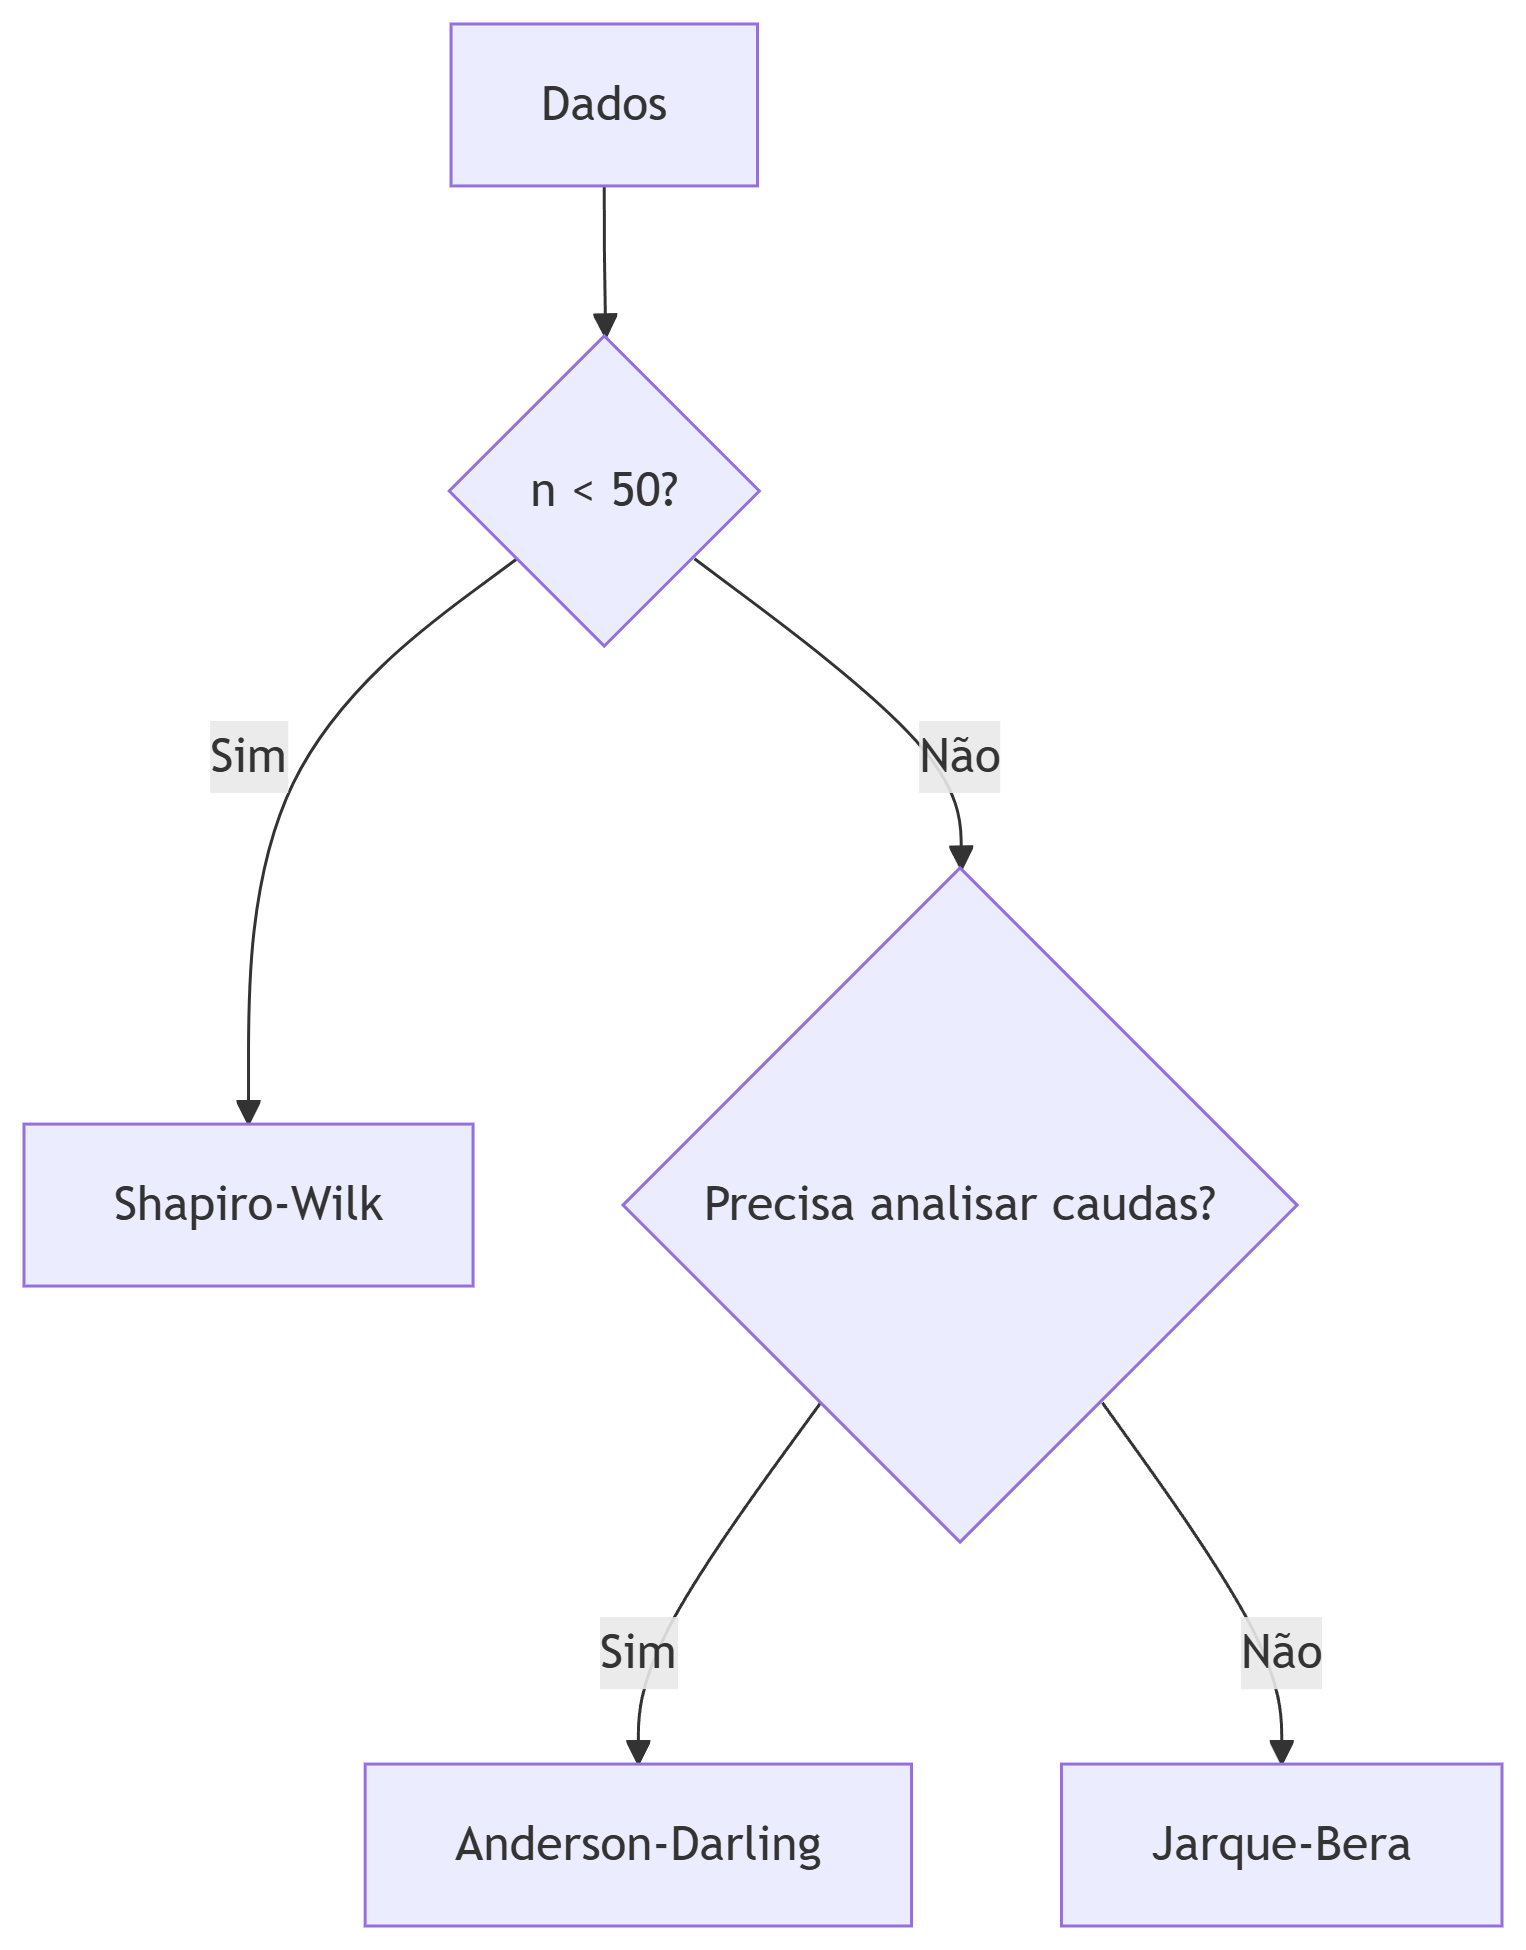

## 💡 Recomendações Práticas

* Combine testes estatísticos com análise gráfica (QQ-Plot, histograma).
* Para amostras muito pequenas (n < 20), os testes de normalidade podem ter baixo poder – considere usar métodos não paramétricos diretamente.
* Em dados com outliers, o Anderson-Darling ou Shapiro-Wilk são melhores que o K-S.
* Sempre reporte o teste usado em metodologias de pesquisa.

## 📌 Teste de Shapiro-Wilk

* Quando usar: Pequenas e médias amostras (n < 50 idealmente, mas pode ir até ~5000).

* Hipóteses: H₀: Os dados seguem uma distribuição normal. H¹: Os dados não seguem uma distribuição normal.

* Exemplo: Avaliar se os níveis de pressão de um grupo seguem distribuição normal antes de aplicar teste t para dois grupos.

In [10]:
from scipy import stats
import numpy as np

# Dados de pressão arterial diastólica (mmHg)
pressao = np.array([72, 75, 80, 82, 78, 85, 79, 76, 81, 77])

# Aplicando Shapiro-Wilk
stat, p = stats.shapiro(pressao)
print(f"Estatística W: {stat:.4f}")
print(f"p-valor: {p:.4f}")

# Interpretação
alpha = 0.05
if p > alpha:
    print("✅ Dados normais (p > 0.05)")
else:
    print("❌ Dados não normais (p ≤ 0.05)")

Estatística W: 0.9989
p-valor: 1.0000
✅ Dados normais (p > 0.05)


Interpretação
* W próximo de 1 indica maior aderência à normalidade
* p-valor > 0.05 → não rejeitamos a normalidade

## 📌 Teste de Anderson-Darling

* Quando usar: Amostras de qualquer tamanho. Mais sensível às caudas da distribuição. Para detectar não-normalidade nas caudas da distribuição. Quando outliers são uma preocupação
* Hipóteses: H₀: Os dados seguem uma distribuição normal. H¹: Os dados não seguem uma distribuição normal.
* Exemplo: Antes de aplicar ANOVA sobre pressão arterial, verificar se a suposição de normalidade se sustenta.

In [11]:
from scipy.stats import anderson

# Dados de nível de glicose em jejum (mg/dL)
glicose = np.array([92, 105, 110, 88, 150, 132, 98, 115, 120, 140])

# Aplicando Anderson-Darling
result = anderson(glicose)
print(f"Estatística A²: {result.statistic:.4f}")
print("Valores críticos:", result.critical_values)
print("Níveis de significância:", result.significance_level)

# Interpretação
for i in range(len(result.critical_values)):
    if result.statistic < result.critical_values[i]:
        print(f"✅ Nível {result.significance_level[i]}%: Dados normais")
    else:
        print(f"❌ Nível {result.significance_level[i]}%: Dados não normais")

Estatística A²: 0.1812
Valores críticos: [0.501 0.57  0.684 0.798 0.95 ]
Níveis de significância: [15.  10.   5.   2.5  1. ]
✅ Nível 15.0%: Dados normais
✅ Nível 10.0%: Dados normais
✅ Nível 5.0%: Dados normais
✅ Nível 2.5%: Dados normais
✅ Nível 1.0%: Dados normais


Interpretação
* Compara a estatística A² com valores críticos em diferentes níveis de significância
* Se A² < valor crítico → normalidade naquele nível

## 📌 Teste de Jarque-Bera

* Quando usar: Dados com amostras moderadas ou grandes. Baseado em: Assimetria (skewness) e curtose (kurtosis).

* Hipóteses: H₀: Os dados seguem distribuição normal. H¹: Os dados têm assimetria ou curtose anormais.

* Exemplo: Avaliar se o tempo de permanência hospitalar é normalmente distribuído antes de aplicar regressão linear.

In [12]:
from scipy.stats import jarque_bera

# Dados de IMC em adultos
imc = np.random.normal(loc=26, scale=3, size=100)

# Aplicando Jarque-Bera
stat, p = jarque_bera(imc)
print(f"Estatística JB: {stat:.4f}")
print(f"p-valor: {p:.4f}")

# Interpretação
if p > 0.05:
    print("✅ Dados normais (distribuição simétrica e mesocúrtica)")
else:
    print("❌ Dados não normais (assimétricos ou platicúrticos/leptocúrticos)")

Estatística JB: 1.8627
p-valor: 0.3940
✅ Dados normais (distribuição simétrica e mesocúrtica)


Testa simultaneamente:
* Assimetria = 0 (distribuição simétrica)
* Curtose = 3 (mesocúrtica, como a normal)

## 🎯 Conclusão

Os testes paramétricos de normalidade ajudam a validar a aplicação de testes que exigem normalidade. Sempre que possível, combine com visualizações (histograma, QQ-plot) para decidir com mais segurança